### Import implementation classes

In [12]:
from SchedulingProblem import ProjectSchedulingModel
from ArtificialBeeColony import ArtificialBeeColony, Parameters

### Load problems instances

In [2]:
PATH = "j30.sm/j30"
problems = [ProjectSchedulingModel.from_file(f"{PATH}{i}_{j}.sm") for i in range(1, 49) for j in range(1, 11)]

In [3]:
with open("j30opt.sm", "r") as f:
    lines = f.readlines()

optimal = []
for line in lines[22:502]:
    line = line.split()
    optimal.append(int(line[2]))

In [15]:
def normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

### Instantiate ABC optimizer

In [4]:
n = 120
abc = ArtificialBeeColony(psmodel=problems[n])
params = Parameters(N=200, limit=50, max_trials=200)

### Solve

In [5]:
history = abc.optimize(params=params)
population_diversity = abc.population_divsersity
average_distance = abc.average_distance

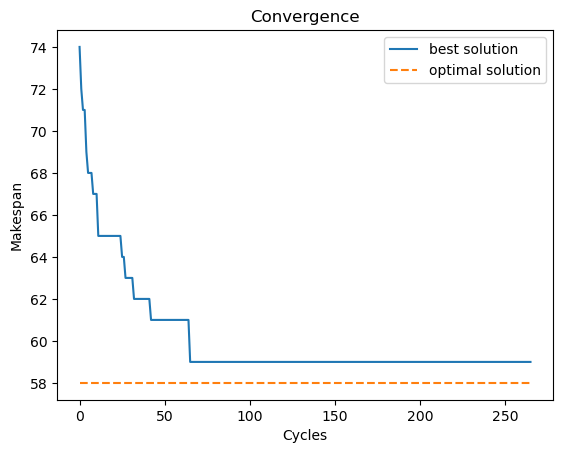

In [14]:
import matplotlib.pyplot as plt

plt.plot([s.get_makespan() for s in history], label='best solution')
plt.plot([optimal[n]] * len(history), linestyle='--', label='optimal solution')

plt.xlabel('Cycles')
plt.ylabel('Makespan')
plt.title('Convergence')
plt.legend()

plt.show()

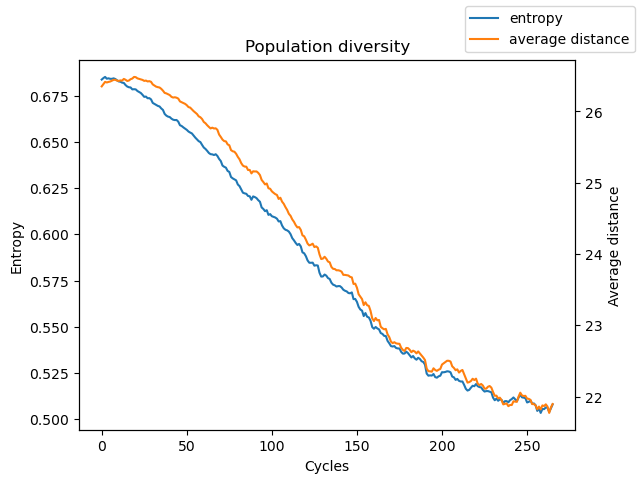

In [21]:
# Sample data
x = [i for i in range(len(population_diversity))]
y1 = population_diversity      # First dataset
y2 = average_distance # Second dataset (different scale)

# Create a figure and axis
fig, ax1 = plt.subplots()

color1 = '#1f77b4'  # blue from Tableau palette
color2 = '#ff7f0e'  # orange from Tableau palette

# Plot the first dataset
ax1.plot(x, y1, label='entropy', color=color1)
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, label='average distance', color=color2)
ax2.set_ylabel('Average distance')
ax2.tick_params(axis='y')

# Optional: Add legends
fig.legend(loc="upper right")

# Show the plot
plt.title("Population diversity")
plt.show()


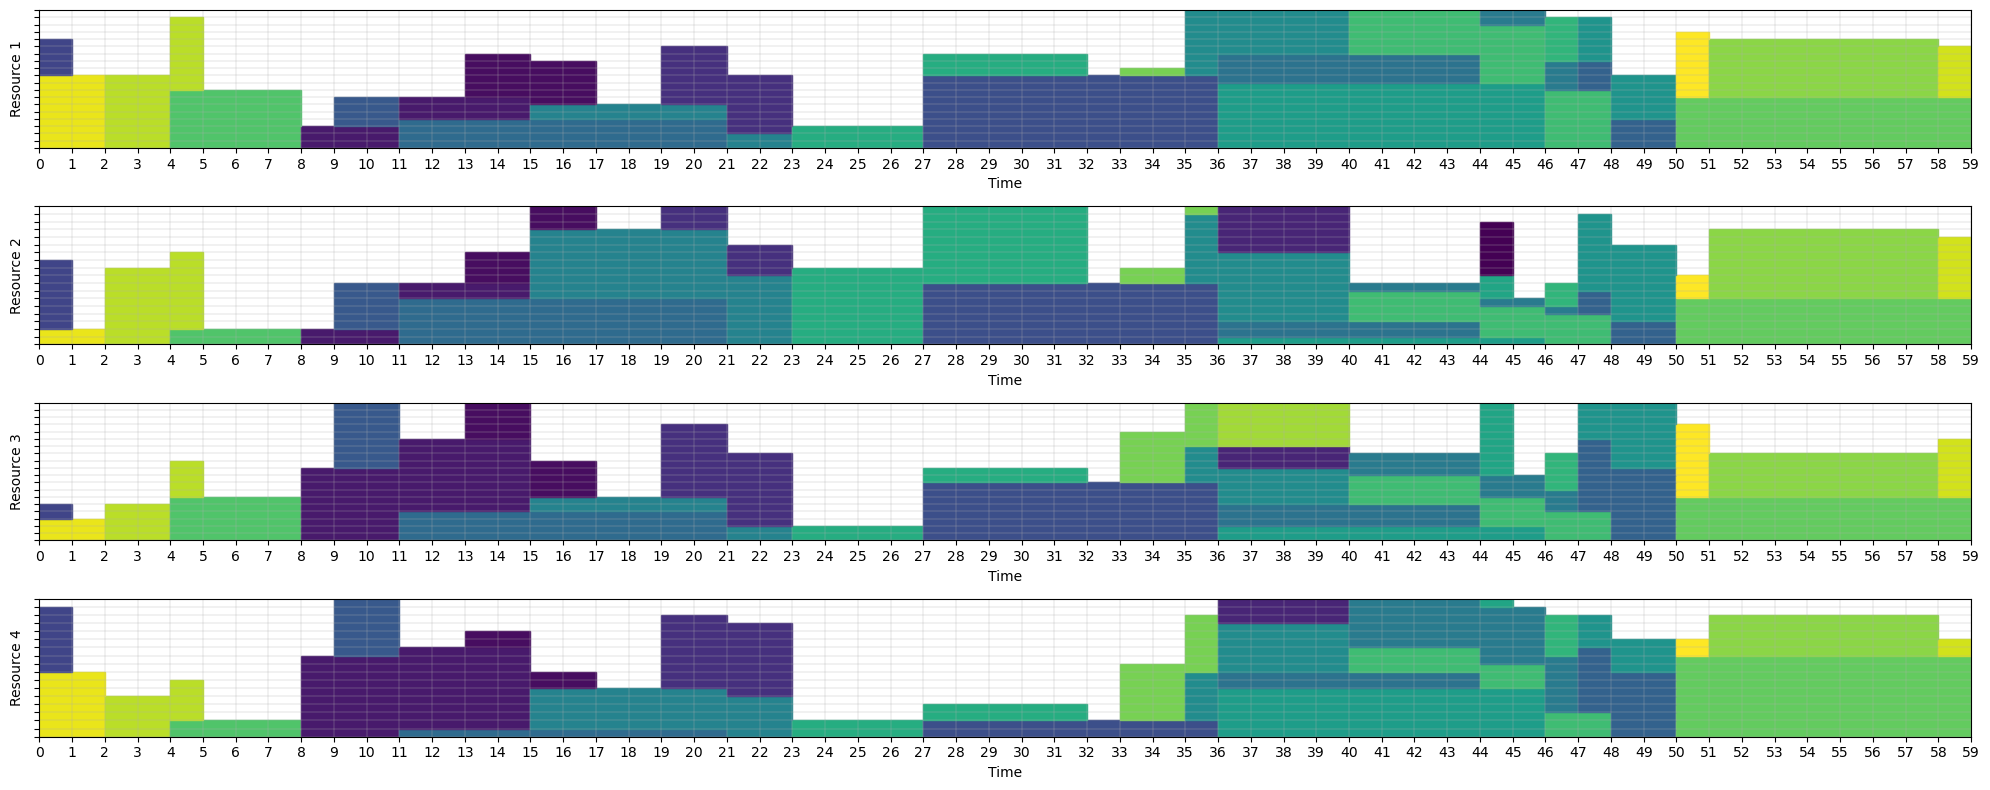

In [8]:
history[-1].plot()